In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
window = 243

# 持仓盈亏与盈亏占比

In [40]:
df = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/881001.WI.xlsx')

In [41]:
df.tail()

,turnover days,current return,profit percentage
2018-05-24,68.901943,-0.046329,0.364815
2018-05-25,69.035216,-0.055445,0.320691
2018-05-28,69.159988,-0.064059,0.287248
2018-05-29,69.244080,-0.072848,0.250584
2018-05-30,69.201579,-0.105422,0.153975


In [42]:
df = df[df.index >= '2013-01-01']

# 加权回购期限

In [43]:
repo = pd.read_excel('D:/Data/risk/weighted_repo.xlsx')

In [44]:
# repo.tail()

# 股票流动性风险

In [45]:
st_li = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/amihud_liquidity.xlsx')

In [46]:
# st_li.tail()

In [47]:
st_li['z'] = st_li['wdqa_corwin and schultz'].rolling(window).apply(lambda x: (x[-1] - x.mean()) / x.std())

In [48]:
st_li.loc[st_li['z'].abs() < 2, 'z'] = 0

In [77]:
st_li.tail()

,sz50_amihud,sz50_corwin and schultz,sz50_wu,sz_roll,wdqa_amihud,wdqa_wu,wdqa_corwin and schultz,wdqa_roll,hs300_amihud,hs300_wu,...,zz800_roll,zxb_amihud,zxb_wu,zxb_corwin and schultz,zxb_roll,cyb_amihud,cyb_wu,cyb_corwin and schultz,cyb_roll,z
2018-05-24,0.000238,0.001361,1.347681,0.008731,0.005369,1.590058,0.004027,0.014934,0.000773,1.265426,...,0.012817,0.001545,1.248622,0.030270,0.017158,0.000843,0.973530,0.001176,0.014335,0.00000
2018-05-25,0.000354,0.000016,1.738543,0.008671,0.005344,1.424557,0.007694,0.014985,0.000926,1.439867,...,0.012936,0.001813,1.286620,0.026015,0.017598,0.001121,1.170114,0.003872,0.014213,0.00000
2018-05-28,0.000342,0.000171,1.786659,0.008581,0.007589,1.965965,0.012821,0.014969,0.001021,1.549767,...,0.012890,0.001522,1.053291,0.012276,0.017648,0.001793,1.786246,0.004922,0.014231,0.00000
2018-05-29,0.000434,0.003033,2.012322,0.008315,0.006296,1.653791,0.004965,0.015028,0.000908,1.506236,...,0.012946,0.001065,0.773653,0.006439,0.017656,0.002111,1.811367,0.007941,0.014379,0.00000
2018-05-30,0.001055,0.016322,4.851521,0.008318,0.126801,19.624064,0.040049,0.015133,0.001955,3.107215,...,0.012810,0.002697,1.658264,0.029366,0.017141,0.003084,2.111752,0.043095,0.014388,5.34737


# 人民币资产和全球资产系统性风险

In [49]:
risk = pd.read_excel('D:/Data/risk/systematic.xlsx')

In [50]:
risk.tail()

,China,Global
2018-05-24,0.729750,0.901698
2018-05-25,0.729252,0.902010
2018-05-28,0.728881,0.902360
2018-05-29,0.728896,0.902773
2018-05-30,0.728942,0.903589


In [51]:
risk['China z'] = risk['China'].rolling(window).apply(lambda x: (x[-1] - x.mean()) / x.std())
risk['Global z'] = risk['Global'].rolling(window).apply(lambda x: (x[-1] - x.mean()) / x.std())

# 股债相对收益率

In [52]:
eyby = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/EYBY.xlsx')

In [53]:
eyby.tail()

,pe_ttm,ytm_b,close
2018-05-24,17.7516,4.3960,4316.1762
2018-05-25,17.6523,4.3773,4289.1219
2018-05-28,17.6196,4.3775,4282.5155
2018-05-29,17.4832,4.3814,4247.8807
2018-05-30,17.0394,4.3777,4135.8552


In [54]:
eyby = eyby.dropna()

In [55]:
eyby['spread'] = ((100. / eyby['pe_ttm']) - eyby['ytm_b']).rolling(window=5).mean()
eyby['spread'] = eyby['spread'] / 100

In [56]:
eyby['z'] = eyby['spread'].rolling(window=window).apply(lambda x: (x[-1] - x.mean()) / x.std())

# 市场一致度

In [57]:
cons = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/consistency.xlsx', index_col=0)

In [58]:
cons.tail()

,con60
date,
2018-05-24,0.820862
2018-05-25,0.816664
2018-05-28,0.815923
2018-05-29,0.813655
2018-05-30,0.823457


In [59]:
cons = cons[cons.index >= '2005-01-01']

In [60]:
cons['z'] = cons['con60'].rolling(window=window).apply(lambda x: (x[-1] - x.mean()) / x.std())

# 债券流动性

In [61]:
bo_li = pd.read_excel('D:/Data/risk/bond_liquidity.xlsx', index_col=0)

In [62]:
bo_li.tail()

,ILLIQUIDITY
TRADINGDAY,
2018-05-24,1.064877
2018-05-25,1.183279
2018-05-28,1.226556
2018-05-29,1.487782
2018-05-30,0.788561


In [63]:
bo_li['z'] = bo_li['ILLIQUIDITY'].rolling(window=window).apply(lambda x: (x[-1] - x.mean()) / x.std())

In [64]:
bo_li.loc[bo_li['z'].abs() < 2, 'z'] = 0

# 点击量数据

In [65]:
click = pd.read_excel(u'D:/Data/risk/点击量数据.xlsx')

In [66]:
click.tail()

,Date,Page Clicks,# of Users
1389,2018-05-24,3464701.0,955288.0
1390,2018-05-25,3423695.0,933176.0
1391,2018-05-28,3702476.0,1037106.0
1392,2018-05-29,3579748.0,1016238.0
1393,2018-05-30,3837155.0,1097424.0


In [67]:
click = click.set_index('Date')

In [68]:
click['click'] = click['Page Clicks'].rolling(20).mean()

In [69]:
click['z'] = click['click'].rolling(window).apply(lambda x: (x[-1] - x.mean()) / x.std())

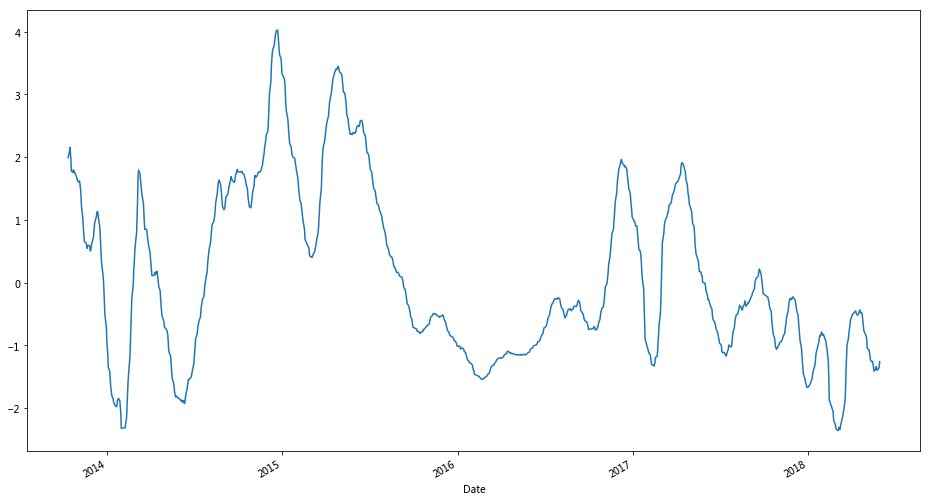

In [70]:
click['z'].plot(figsize=(16, 9))

# 美欧经济意外指数之差

In [71]:
us_eu = pd.read_excel('D:/Data/macro/us/econ_accident.xlsx')

In [72]:
us_eu['diff'] = us_eu['us econ ac'] - us_eu['eu econ ac']

# 画图

Text(0.5,1,u'\u7f8e\u56fd\u4e0e\u6b27\u5143\u533a\u7ecf\u6d4e\u610f\u5916\u6307\u6570\u4e4b\u5dee')

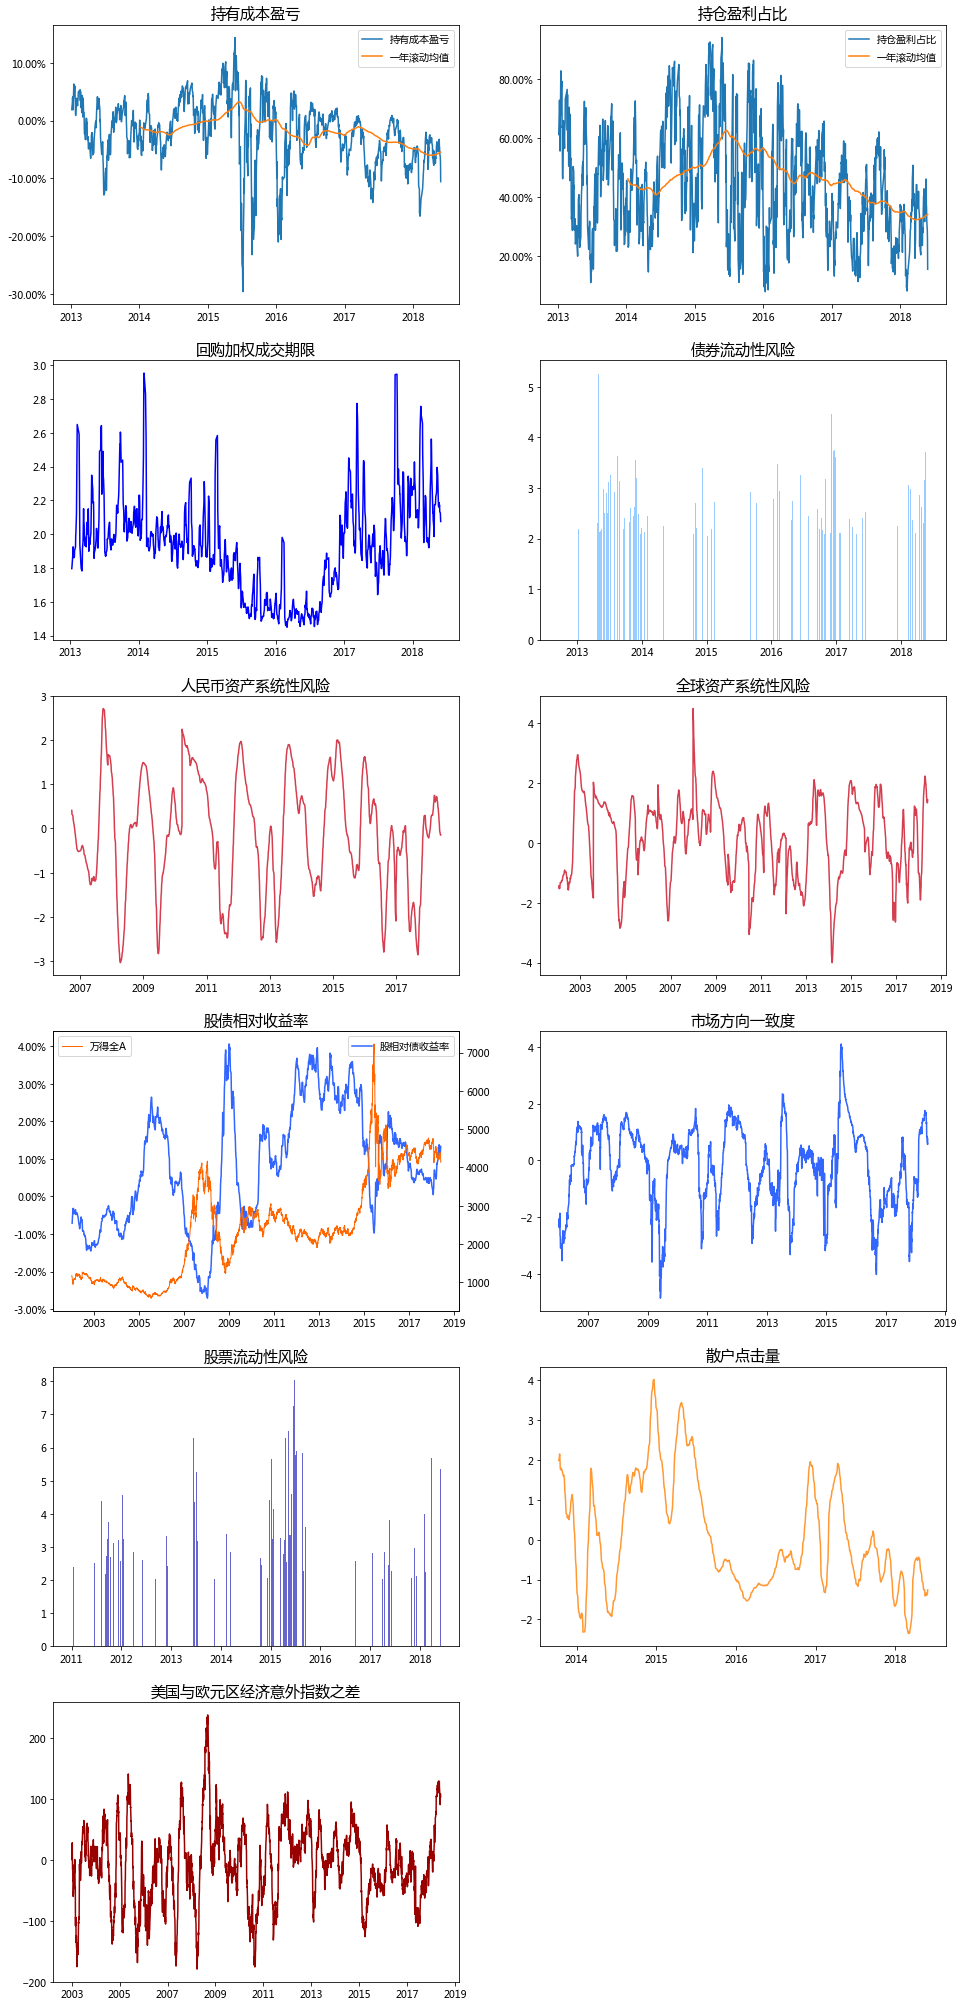

In [73]:
fig = plt.figure(figsize=(16, 36))
row = 6

ax1 = fig.add_subplot(row, 2, 1)
ax1.plot(df.index, df['current return'], label=u'持有成本盈亏')
ax1.plot(df.index, df['current return'].rolling(window=243).mean(), label=u'一年滚动均值')
ax1.legend()
ax1.set_title(u'持有成本盈亏', fontsize=15)
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

ax2 = fig.add_subplot(row, 2, 2)
ax2.plot(df.index, df['profit percentage'], label=u'持仓盈利占比')
ax2.plot(df.index, df['profit percentage'].rolling(window=243).mean(), label=u'一年滚动均值')
ax2.legend()
ax2.set_title(u'持仓盈利占比', fontsize=15)
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

ax3 = fig.add_subplot(row, 2, 3)
ax3.plot(repo.index, repo['rolling mean'], c='blue')
ax3.set_title(u'回购加权成交期限', fontsize=15)

ax4 = fig.add_subplot(row, 2, 4)
ax4.bar(bo_li.index, bo_li['z'].abs(), color='#99CCFF', width=5)
ax4.set_title(u'债券流动性风险', fontsize=15)

ax5 = fig.add_subplot(row, 2, 5)
ax5.plot(risk.index, risk['China z'], c='#D53E4F')
ax5.set_title(u'人民币资产系统性风险', fontsize=15)

ax6 = fig.add_subplot(row, 2, 6)
ax6.plot(risk.index, risk['Global z'], c='#D53E4F')
ax6.set_title(u'全球资产系统性风险', fontsize=15)

ax7 = fig.add_subplot(row, 2, 7)
ax7.plot(eyby.index, eyby['spread'], label=u'股相对债收益率', c='#3366FF')
ax7.legend()
vals = ax7.get_yticks()
ax7.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax77 = ax7.twinx()
ax77.plot(eyby.index, eyby['close'], label=u'万得全A', color='#FF6600', linewidth=1)
ax77.legend(loc='upper left')
ax7.set_title(u'股债相对收益率', fontsize=15)

ax8 = fig.add_subplot(row, 2, 8)
ax8.plot(cons.index, cons['z'], c='#3366FF')
ax8.set_title(u'市场方向一致度', fontsize=15)

ax9 = fig.add_subplot(row, 2, 9)
ax9.bar(st_li.index, st_li['z'].abs(), color='#6666CC', width=5)
ax9.set_title(u'股票流动性风险', fontsize=15)

ax10 = fig.add_subplot(row, 2, 10)
ax10.plot(click.index, click['z'], c='#FF9933')
ax10.set_title(u'散户点击量', fontsize=15)

ax11 = fig.add_subplot(row, 2, 11)
ax11.plot(us_eu['diff'], color='#990000')
ax11.set_title(u'美国与欧元区经济意外指数之差', fontsize=15)

In [74]:
fig.savefig('plot.png', dpi=200, bbox_inches='tight')